# **Preprocessing Steps**


In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [2]:
import numpy as np
import glob
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path_1 = "gdrive/My Drive/real_rain_and_rainfree_1000/train/rain"
imgs = glob.glob(path_1+"/*.png")
imgs = sorted(imgs)

train_rain = []
no_train_rain = 0

for i in imgs:
  im = cv.imread(i)
  im = cv.resize(im,(128,128))
  cv.waitKey()
  no_train_rain+=1
  train_rain.append(im)

 

In [4]:
print(no_train_rain)

900


In [5]:
path_2 = "gdrive/My Drive/real_rain_and_rainfree_1000/train/gt"
imgs = glob.glob(path_2+"/*.png")
imgs = sorted(imgs)

train_no_rain = []
no_train_no_rain = 0

for i in imgs:
  im = cv.imread(i)
  im = cv.resize(im,(128,128))
  cv.waitKey()
  no_train_no_rain+=1
  train_no_rain.append(im)

In [6]:
print(no_train_no_rain)

900


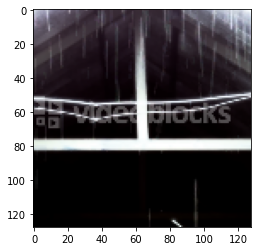

In [7]:
plt.imshow(train_rain[0])

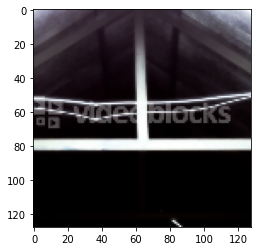

In [8]:
plt.imshow(train_no_rain[0])

In [9]:
import numpy as np
train_rain = np.asarray(train_rain)

In [10]:
train_rain = train_rain/255

In [11]:
print(train_rain[1].shape)

(128, 128, 3)


In [12]:
train_no_rain = np.asarray(train_no_rain)

In [13]:
train_no_rain = train_no_rain/255

In [14]:
train_rain = np.sort(train_rain)
train_no_rain = np.sort(train_no_rain)

In [15]:
import numpy as np
#import tensorflow as tf
from keras.models import *
from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract
#from keras import backend as K

def ClearNN():
    
    inpt = Input(shape=(128,128,3))
    # 1st layer, Conv+relu
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(inpt)
    x = Activation('relu')(x)
    # 15 layers, Conv+BN+relu
    for i in range(5):
        x = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same')(x)
        x = BatchNormalization(axis=-1, epsilon=1e-6)(x)
        x = Activation('relu')(x)   
    for i in range(5):
        x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
        #x = BatchNormalization(axis=-1, epsilon=1e-6)(x)
        x = Activation('relu')(x)  
    # last layer, Conv
    x = Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = Subtract()([inpt, x])   # input - noise
    model = Model(inputs=inpt, outputs=x)
    
    return model

In [23]:
path_3 = "gdrive/My Drive/real_rain_and_rainfree_1000/test/rain"
path_4 = "gdrive/My Drive/real_rain_and_rainfree_1000/test/gt"

In [24]:
imgs = glob.glob(path_3+"/*.png")
imgs = sorted(imgs)

test_rain = []
no_test_rain = 0

for i in imgs:
  im = cv.imread(i)
  im = cv.resize(im,(128,128))
  cv.waitKey()
  no_test_rain+=1
  test_rain.append(im)

print(no_test_rain)

100


In [25]:
imgs = glob.glob(path_4+"/*.png")
imgs = sorted(imgs)

test_no_rain = []
no_test_no_rain = 0

for i in imgs:
  im = cv.imread(i)
  im = cv.resize(im,(128,128))
  cv.waitKey()
  no_test_no_rain+=1
  test_no_rain.append(im)

print(no_test_no_rain)

100


In [26]:
test_rain = np.asarray(test_rain)
test_no_rain = np.asarray(test_no_rain)

test_rain = test_rain/255
test_no_rain = test_no_rain/255

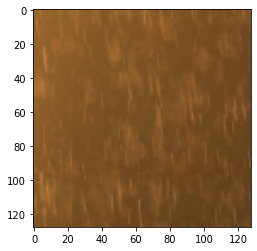

In [27]:
plt.imshow(test_rain[0])

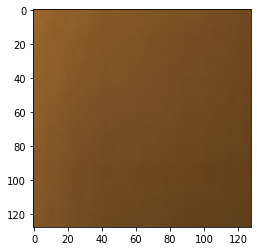

In [28]:
plt.imshow(test_no_rain[0])

In [ ]:
# # import numpy as np
# # x_test = np.load('gdrive/My Drive/rain/x_test_rain.npy')
# # y_test = np.load('gdrive/My Drive/rain/y_test_clean.npy')

# for i in test_rain:
#   i = i/255
# for i in test_no_rain:
#   i = i/255

In [ ]:
# import numpy as np
# #import tensorflow as tf
# from keras.models import *
# from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract
# #from keras import backend as K

# def DnCNN():
    
#     inpt = Input(shape=(256,256,3))
#     # 1st layer, Conv+relu
#     x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(inpt)
#     x = Activation('relu')(x)
#     # 15 layers, Conv+BN+relu
#     for i in range(15):
#         x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
#         x = BatchNormalization(axis=-1, epsilon=1e-3)(x)
#         x = Activation('relu')(x)   
#     # last layer, Conv
#     x = Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same')(x)
#     x = Subtract()([inpt, x])   # input - noise
#     model = Model(inputs=inpt, outputs=x)
    
#     return model

In [29]:
model = ClearNN()

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 128 73856       activation[0][0]                 
______________________________________________________________________________________________

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['accuracy'])

In [32]:
history = model.fit(train_rain,train_no_rain,epochs = 100,validation_data=(test_rain,test_no_rain),shuffle=False)

Epoch 1/100
29/29 [==============================] - 53s 543ms/step - loss: 0.0074 - accuracy: 0.7666 - val_loss: 0.0013 - val_accuracy: 0.8261
Epoch 2/100
29/29 [==============================] - 15s 504ms/step - loss: 9.2218e-04 - accuracy: 0.9246 - val_loss: 0.0013 - val_accuracy: 0.8567
Epoch 3/100
29/29 [==============================] - 15s 512ms/step - loss: 8.9965e-04 - accuracy: 0.9231 - val_loss: 0.0013 - val_accuracy: 0.8689
Epoch 4/100
29/29 [==============================] - 15s 522ms/step - loss: 9.0429e-04 - accuracy: 0.9168 - val_loss: 0.0013 - val_accuracy: 0.8603
Epoch 5/100
29/29 [==============================] - 15s 530ms/step - loss: 9.0783e-04 - accuracy: 0.9225 - val_loss: 0.0013 - val_accuracy: 0.8870
Epoch 6/100
29/29 [==============================] - 16s 542ms/step - loss: 8.9313e-04 - accuracy: 0.9107 - val_loss: 0.0013 - val_accuracy: 0.9190
Epoch 7/100
29/29 [==============================] - 16s 560ms/step - loss: 9.1015e-04 - accuracy: 0.9283 - val_loss

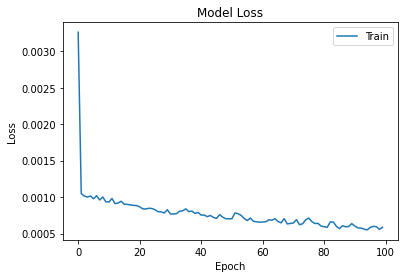

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize history of loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper right')
# plt.show()

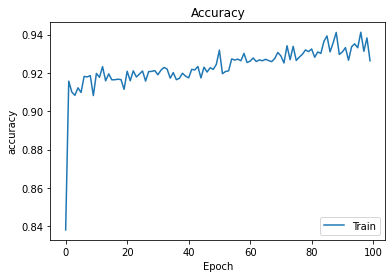

In [68]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

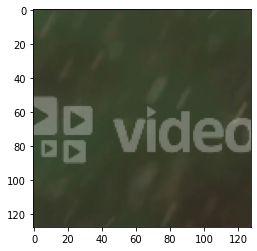

In [34]:
plt.imshow(test_rain[7])

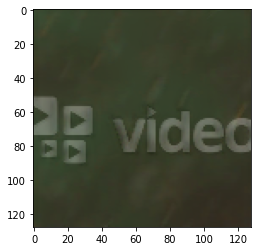

In [62]:
plt.imshow(reconstructed_img[7])

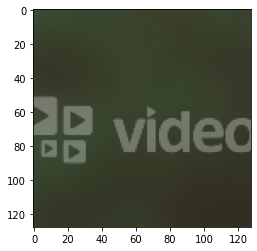

In [63]:
plt.imshow(test_no_rain[7])

In [36]:
reconstructed_img = model.predict(test_rain)

In [37]:
from skimage.measure import compare_psnr, compare_ssim

In [38]:
psnr = []
ssim = []
for i in range(0,test_rain.shape[0]):
    psnr.append(compare_psnr(test_no_rain[i],reconstructed_img[i]))
    ssim.append(compare_ssim(test_no_rain[i],reconstructed_img[i],multichannel=True))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/skimage/measure/simple_metrics.py:65: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  return peak_signal_noise_ratio(im_true, im_test, data_range=data_range)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """
/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


In [39]:
sum(psnr)/len(psnr)

30.00631859433694

In [40]:
sum(ssim)/len(ssim)

0.9366297288454177

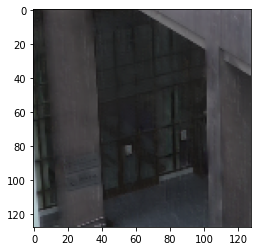

In [41]:
plt.imshow(reconstructed_img[1])

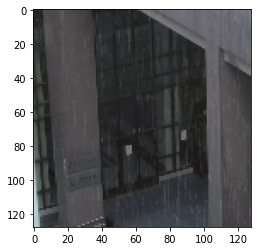

In [42]:
plt.imshow(test_rain[1])

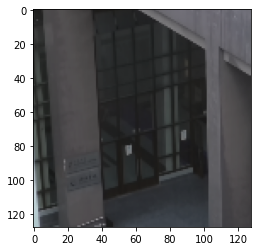

In [43]:
plt.imshow(test_no_rain[1])

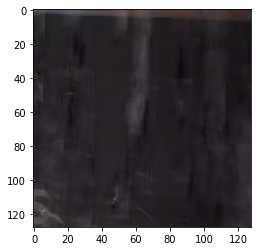

In [60]:
plt.imshow(reconstructed_img[77])

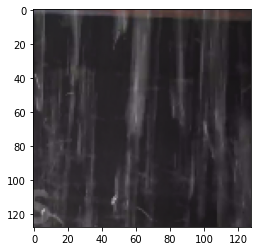

In [59]:
plt.imshow(test_rain[77])

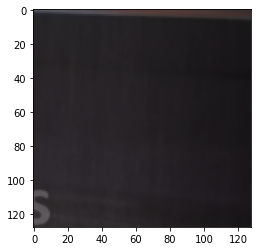

In [61]:
plt.imshow(test_no_rain[77])